<a href="https://colab.research.google.com/github/KhadijatulKobra98/CSC581/blob/main/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
df = pd.read_csv('/content/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:

# Reaname some variables use it for my new dataframe
df = df.rename(columns={'medv': 'TARGET', 'rm': 'RM', 'lstat': 'LSTAT'})
df.head()

,crim,zn,indus,chas,nox,RM,age,dis,rad,tax,ptratio,b,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df[["LSTAT","RM","TARGET"]].head()

,LSTAT,RM,TARGET
0,4.98,6.575,24.0
1,9.14,6.421,21.6
2,4.03,7.185,34.7
3,2.94,6.998,33.4
4,5.33,7.147,36.2


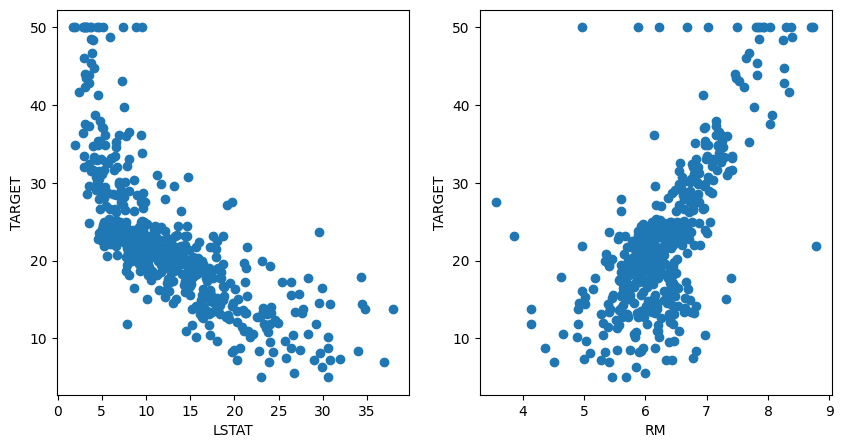

In [ ]:
plt.figure(figsize=(10,5))

features= df[["LSTAT","RM"]]
target= df[["TARGET"]]

plt.subplot(1, 2, 1)
plt.scatter(df["LSTAT"], target)
plt.xlabel("LSTAT")
plt.ylabel("TARGET")

plt.subplot(1, 2, 2)
plt.scatter(df["RM"], target)
plt.xlabel("RM")
plt.ylabel("TARGET")

plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=23)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

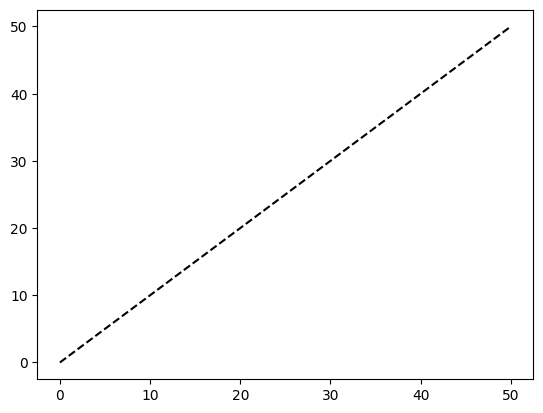

In [ ]:
plt.plot([0,50], [0,50], '--k',label ="Correct Prediction")


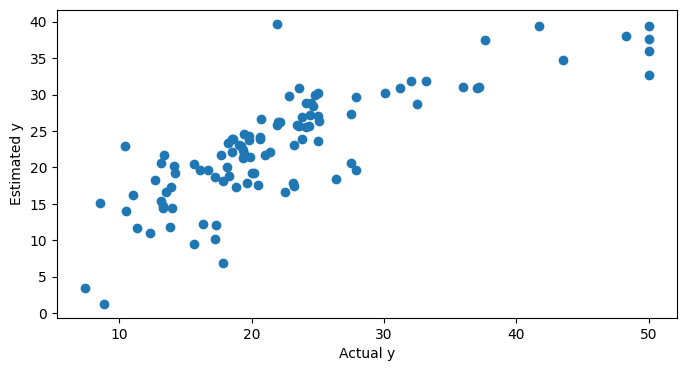

In [ ]:
plt.figure(figsize=(8,4))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual y")
plt.ylabel("Estimated y")
plt.show()


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
intercept = model.intercept_
coff= model.coef_

In [ ]:
intercept

array([0.37428615])

In [ ]:
coff

array([[-0.66721079,  4.88331552]])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squaere error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error:', mae)


r2 = r2_score(y_test, y_pred)
print('R2 :', r2)

Mean squaere error: 30.726065211573893
Mean absolute error: 4.300122669036365
R2 : 0.6433023932639312


In [ ]:
new_houses_data = {
    'LSTAT': [5.0,4.0, 15.0],
    'RM': [7,6,8],
}
new_houses_df = pd.DataFrame(new_houses_data)
new_houses_df

,LSTAT,RM
0,5.0,7
1,4.0,6
2,15.0,8


In [ ]:
predicted_houses_prices = model.predict(new_houses_df)
predicted_houses_prices



array([[31.22144086],
       [27.00533613],
       [29.43264846]])

In [ ]:
new_houses_df['Predicted Price'] = predicted_houses_prices
new_houses_df

,LSTAT,RM,Predicted Price
0,5.0,7,31.221441
1,4.0,6,27.005336
2,15.0,8,29.432648
